In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df

,X,Y
0,-0.85,-2.91
1,2.09,3.06
2,0.19,1.24
3,-0.24,-1.52
4,1.41,2.69
...,...,...
340014,1.75,-1.01
340015,-0.62,3.01
340016,1.56,0.45
340017,-2.19,-1.57


In [4]:
df.shape

(340019, 2)

In [5]:
df.isnull().sum()

X    0
Y    0
dtype: int64

C:\Users\Aoutik Arya\AppData\Local\Temp\ipykernel_7364\4183076416.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df.X,df.Y,cmap='hot',c='blue')


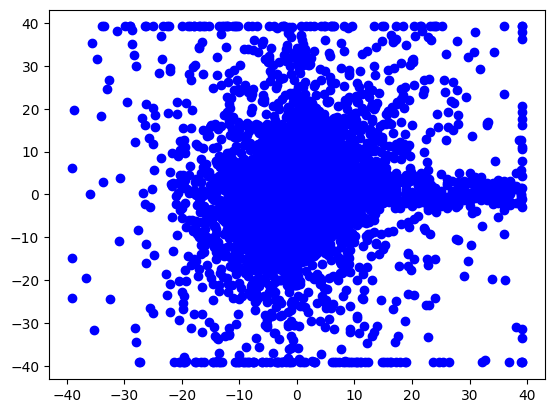

In [6]:
plt.scatter(df.X,df.Y,cmap='hot',c='blue')

<AxesSubplot: >

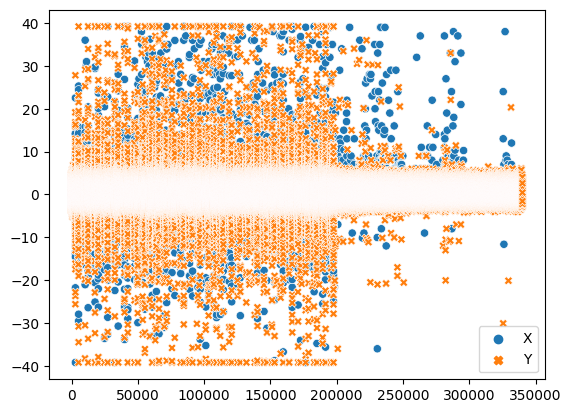

In [7]:
sns.scatterplot(df)

In [8]:
X_train=df.sample(n=int(0.8*len(df)),replace=False)
X_test=df.drop(X_train.index)

In [10]:
X_train=np.array(X_train)
X_train=X_train.reshape(len(X_train),1,2)
X_test=np.array(X_test)
X_test=X_test.reshape(len(X_test),1,2)

In [11]:
X_train

array([[[-0.61, -2.16]],

       [[ 0.41, -1.8 ]],

       [[-1.  , -0.75]],

       ...,

       [[ 0.07, -0.79]],

       [[-0.01, -0.03]],

       [[ 0.52,  1.1 ]]])

In [12]:
X_train.shape ,X_test.shape

((272015, 1, 2), (68004, 1, 2))

In [13]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Activation,RepeatVector,TimeDistributed

In [17]:
model=Sequential()
model.add(LSTM(units=16,activation='relu',input_shape=(1,2),return_sequences=False))
model.add(Dropout(0.2))
#model.add(LSTM(16,activation='relu',return_sequences=False))
#model.add(Dropout(0.5))
model.add(RepeatVector(1))
#model.add(LSTM(16,activation='relu',return_sequences=True))
#model.add(Dropout(0.5))
model.add(LSTM(16,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(TimeDistributed(Dense(2)))
model.compile(loss='mse',optimizer='adam')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 16)                1216      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 repeat_vector_1 (RepeatVect  (None, 1, 16)            0         
 or)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 1, 16)             2112      
                                                                 
 dropout_1 (Dropout)         (None, 1, 16)             0         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 2)             34        
 tributed)                                            

In [18]:
model.fit(X_train,X_train,batch_size=512, epochs=10,validation_split=0.1)

Epoch 1/10
479/479 [==============================] - 4s 4ms/step - loss: 1.8798 - val_loss: 0.1187
Epoch 2/10
479/479 [==============================] - 2s 4ms/step - loss: 0.6278 - val_loss: 0.0927
Epoch 3/10
479/479 [==============================] - 2s 4ms/step - loss: 0.5972 - val_loss: 0.0638
Epoch 4/10
479/479 [==============================] - 2s 4ms/step - loss: 0.5232 - val_loss: 0.0662
Epoch 5/10
479/479 [==============================] - 2s 4ms/step - loss: 0.4889 - val_loss: 0.0704
Epoch 6/10
479/479 [==============================] - 2s 4ms/step - loss: 0.5013 - val_loss: 0.0558
Epoch 7/10
479/479 [==============================] - 2s 4ms/step - loss: 0.4686 - val_loss: 0.0567
Epoch 8/10
479/479 [==============================] - 2s 4ms/step - loss: 0.4725 - val_loss: 0.0749
Epoch 9/10
479/479 [==============================] - 2s 4ms/step - loss: 0.4678 - val_loss: 0.0554
Epoch 10/10
479/479 [==============================] - 2s 4ms/step - loss: 0.4579 - val_loss: 0.0492

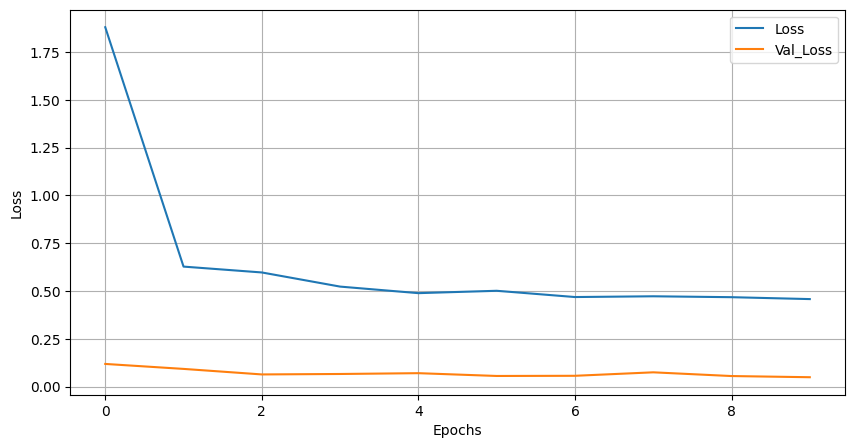

In [19]:
plt.figure(figsize = (10, 5))
plt.plot(model.history.history['loss'], label = 'Loss')
plt.plot(model.history.history['val_loss'], label = 'Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

In [20]:
X_train2=model.predict(X_train)


8501/8501 [==============================] - 13s 1ms/step


In [21]:
X_train2.shape

(272015, 1, 2)

In [22]:
X_train2=X_train2.reshape(X_train2.shape[0],X_train2.shape[2])
X_train=X_train.reshape(X_train.shape[0],X_train.shape[2])

In [23]:
mae_train=[]
for i in range (len(X_train)):
    mae_train.append(np.mean(np.abs(X_train2[i]-X_train[i])))

In [24]:
mae_train

[0.17020378470420844,
 0.1982801365852356,
 0.11357632279396057,
 0.01466434240341187,
 0.08592227458953858,
 0.12673262715339667,
 0.07909617900848387,
 0.16908930033445357,
 0.3733455038070679,
 0.019417995512485468,
 0.31932365179061883,
 0.03543215036392211,
 0.2096807411313057,
 0.08083882838487623,
 0.16728838682174674,
 0.10823694109916687,
 0.18265256077051167,
 0.07278445959091193,
 0.06658358335494997,
 0.14443918943405143,
 0.976400871276855,
 0.0970939421653747,
 0.19098906517028813,
 0.13088714241981508,
 0.09124398231506348,
 0.1715449714660644,
 0.20283359050750738,
 0.055339998006820684,
 0.22359458565711965,
 0.043527745902538315,
 0.03501943111419675,
 0.04588082313537592,
 0.08521482348442078,
 0.07027750134468069,
 0.21530635237693774,
 0.028768203258514424,
 0.07064112424850466,
 0.008698905706405635,
 0.14925870180129996,
 0.041449202299118026,
 0.058266761302948,
 0.14467347502708428,
 0.05319357186555865,
 0.2158701467514037,
 0.06700084239244462,
 0.11848516702

In [42]:
np.median(mae_train),np.mean(mae_train),np.max(mae_train),np.percentile(mae_train,90)

(0.09825266569852828,
 0.1259827804153581,
 8.720823478698733,
 0.2286430082321166)

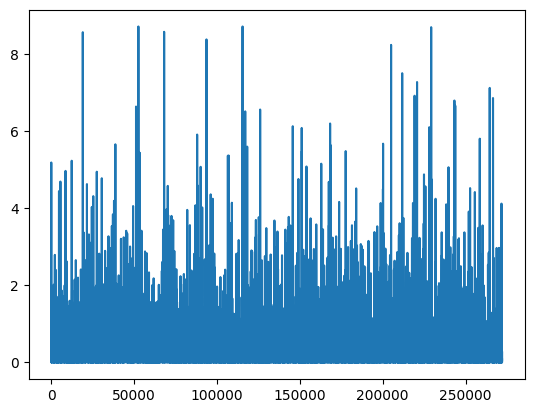

In [26]:
plt.plot(mae_train)

(array([2.70684e+05, 8.31000e+02, 2.75000e+02, 1.23000e+02, 4.50000e+01,
        2.40000e+01, 1.30000e+01, 1.00000e+01, 3.00000e+00, 7.00000e+00]),
 array([3.10850143e-04, 8.72362113e-01, 1.74441338e+00, 2.61646464e+00,
        3.48851590e+00, 4.36056716e+00, 5.23261843e+00, 6.10466969e+00,
        6.97672095e+00, 7.84877222e+00, 8.72082348e+00]),
 <BarContainer object of 10 artists>)

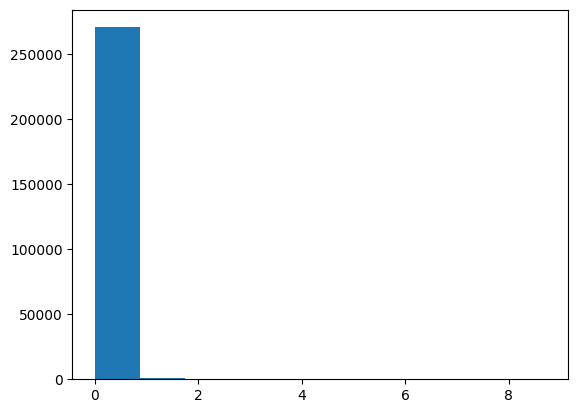

In [27]:
plt.hist(mae_train)

In [29]:
thres=1
anam_test=[e for e in mae_train if e >thres]
len(anam_test)

1097

In [34]:
train=pd.DataFrame({'X_train_x':X_train[:,0],'X_train_y':X_train[:,1],'X_train2_x':X_train2[:,0],'X_train2_y':X_train2[:,1],'mae_train':mae_train})

In [36]:
train

,X_train_x,X_train_y,X_train2_x,X_train2_y,mae_train
0,-0.61,-2.16,-0.488252,-1.941341,0.170204
1,0.41,-1.80,0.322018,-1.491421,0.198280
2,-1.00,-0.75,-0.850152,-0.672695,0.113576
3,-0.42,0.15,-0.438376,0.139047,0.014664
4,0.34,-1.23,0.305281,-1.092874,0.085922
...,...,...,...,...,...
272010,-0.99,-3.35,-0.760607,-3.008234,0.285580
272011,0.37,-2.17,0.234682,-1.815221,0.245049
272012,0.07,-0.79,0.126069,-0.814955,0.040512
272013,-0.01,-0.03,-0.070804,-0.112303,0.071554


In [37]:
train=train[train['mae_train']>thres]

In [39]:
train

,X_train_x,X_train_y,X_train2_x,X_train2_y,mae_train
82,22.93,-25.81,19.047405,-19.311468,5.190563
271,3.61,-7.56,3.171932,-5.968294,1.014887
279,-5.62,-14.90,-3.990995,-13.310338,1.609333
282,-7.84,-14.50,-6.426822,-12.813815,1.549682
1382,-5.57,-19.90,-3.828468,-17.632675,2.004428
...,...,...,...,...,...
270667,28.00,2.03,25.182283,1.907226,1.470245
270682,23.36,2.17,21.193291,2.064094,1.136308
270695,-20.26,4.47,-18.267292,3.614552,1.424078
271669,1.11,-39.20,2.498753,-32.341148,4.123802


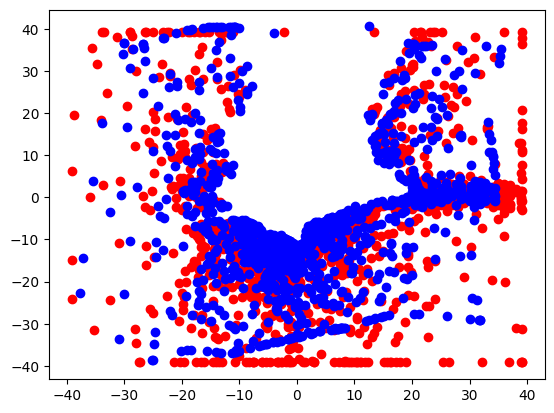

In [41]:
plt.scatter(train.X_train_x,train.X_train_y,color='red')

plt.scatter(train.X_train2_x,train.X_train2_y,color='blue')

## Anomalies in Test data


In [43]:
X_test2=model.predict(X_test)

2126/2126 [==============================] - 3s 2ms/step


In [45]:
X_test.shape , X_test2.shape

((68004, 1, 2), (68004, 1, 2))

In [46]:
X_test2=X_test2.reshape(X_test2.shape[0],X_test2.shape[2])
X_test=X_test.reshape(X_test.shape[0],X_test.shape[2])

In [47]:
mae_test=[]
for i in range (len(X_test)):
    mae_test.append(np.mean(np.abs(X_test2[i]-X_test[i])))

In [49]:
mae_test

[0.21318012356758115,
 0.06585837125778196,
 0.2177299451828003,
 0.19779231727123261,
 0.08569236516952516,
 0.12133644819259637,
 0.02463746070861822,
 0.18555752933025363,
 0.16355184078216545,
 0.0916309228539467,
 0.1730849170684814,
 0.19464275985956184,
 0.08576654672622674,
 0.08224119424819953,
 0.18172035366296774,
 0.09190289020538323,
 0.0396460449695587,
 0.1270897352695466,
 0.11436850786209107,
 0.11270723819732664,
 0.08067446231842035,
 0.2956178426742554,
 0.2821108758449554,
 0.20445802092552184,
 0.060068955421447745,
 0.02895376741886141,
 0.24399086475372306,
 0.11970361649990087,
 0.16076975345611566,
 0.08089555501937873,
 0.09228385150432587,
 0.12493427395820617,
 0.16602391004562378,
 0.05712175756692883,
 0.02663627207279204,
 0.17670156478881838,
 0.05706995189189912,
 0.062455735206604024,
 0.18929080605506893,
 0.050129758119583145,
 0.10397778749465947,
 0.20437892645597466,
 0.14537575006484982,
 0.13080938160419459,
 0.15303601741790784,
 0.20475804328

In [51]:
np.median(mae_test),np.mean(mae_test),np.max(mae_test),np.percentile(mae_test,90)

(0.0986892980337143,
 0.12561256973873783,
 8.42976119995117,
 0.22704740488529204)

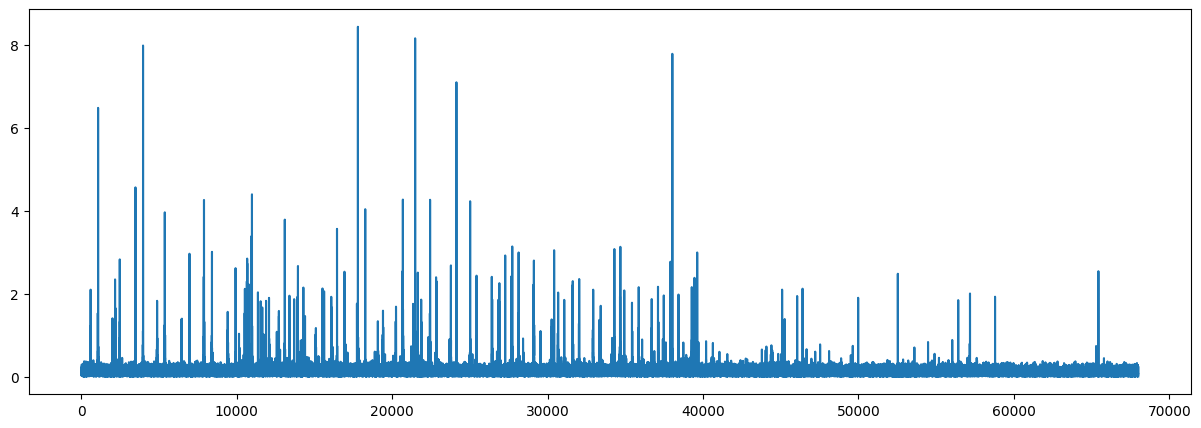

In [53]:
plt.figure(figsize=(15,5))
plt.plot(mae_test)

In [54]:
thres2=1
anam_test=[e for e in mae_test if e >thres2]
len(anam_test)

276

(array([6.7648e+04, 2.2200e+02, 8.4000e+01, 3.1000e+01, 7.0000e+00,
        6.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 4.0000e+00]),
 array([3.54669094e-04, 8.43295322e-01, 1.68623598e+00, 2.52917663e+00,
        3.37211728e+00, 4.21505793e+00, 5.05799859e+00, 5.90093924e+00,
        6.74387989e+00, 7.58682055e+00, 8.42976120e+00]),
 <BarContainer object of 10 artists>)

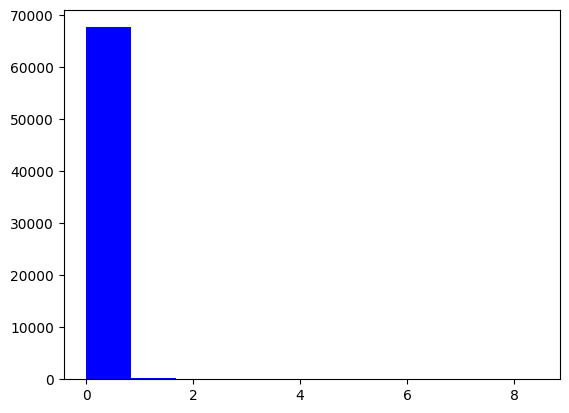

In [55]:
plt.hist(mae_test,color='blue')

In [73]:
test=pd.DataFrame({'X_test2_x':X_test2[:,0],'X_test2_y':X_test2[:,1],'X_test_x':X_test[:,0],'X_test_y':X_test[:,1],'mae_test':mae_test})

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 82 to 271838
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X_train_x   1097 non-null   float64
 1   X_train_y   1097 non-null   float64
 2   X_train2_x  1097 non-null   float32
 3   X_train2_y  1097 non-null   float32
 4   mae_train   1097 non-null   float64
dtypes: float32(2), float64(3)
memory usage: 42.9 KB


In [75]:
test=test[test['mae_test']>thres2]

In [76]:
test

,X_test2_x,X_test2_y,X_test_x,X_test_y,mae_test
568,12.983700,-2.191944,14.18,-3.42,1.212178
589,-19.959749,-5.746450,-21.78,-5.20,1.183351
590,-1.496119,-15.113214,-2.44,-17.45,1.640334
591,-10.276347,-20.296600,-11.95,-22.82,2.098526
1051,-8.520830,-13.076253,-10.39,-14.27,1.531458
...,...,...,...,...,...
52532,32.628269,3.830891,37.00,3.24,2.481311
56418,0.249538,-16.926447,-0.33,-20.04,1.846545
57176,29.380760,1.262486,33.00,0.87,2.005863
58788,29.383110,1.780316,33.00,1.54,1.928603


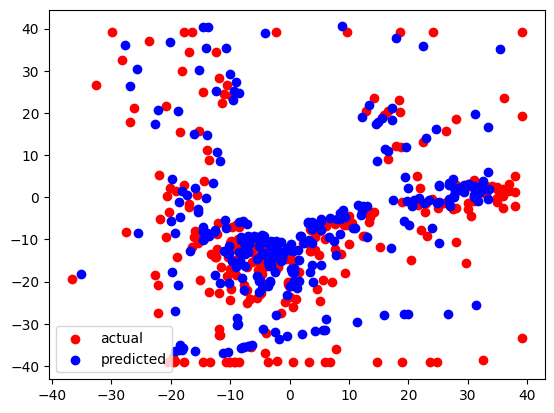

In [80]:
plt.scatter(test.X_test_x,test.X_test_y,color='red',label='actual')
plt.scatter(test.X_test2_x,test.X_test2_y,color='blue',label='predicted')
plt.legend()

In [94]:
test

,X_test2_x,X_test2_y,X_test_x,X_test_y,mae_test
568,12.983700,-2.191944,14.18,-3.42,1.212178
589,-19.959749,-5.746450,-21.78,-5.20,1.183351
590,-1.496119,-15.113214,-2.44,-17.45,1.640334
591,-10.276347,-20.296600,-11.95,-22.82,2.098526
1051,-8.520830,-13.076253,-10.39,-14.27,1.531458
...,...,...,...,...,...
52532,32.628269,3.830891,37.00,3.24,2.481311
56418,0.249538,-16.926447,-0.33,-20.04,1.846545
57176,29.380760,1.262486,33.00,0.87,2.005863
58788,29.383110,1.780316,33.00,1.54,1.928603


In [93]:
train

,X_train_x,X_train_y,X_train2_x,X_train2_y,mae_train
82,22.93,-25.81,19.047405,-19.311468,5.190563
271,3.61,-7.56,3.171932,-5.968294,1.014887
279,-5.62,-14.90,-3.990995,-13.310338,1.609333
282,-7.84,-14.50,-6.426822,-12.813815,1.549682
1382,-5.57,-19.90,-3.828468,-17.632675,2.004428
...,...,...,...,...,...
270667,28.00,2.03,25.182283,1.907226,1.470245
270682,23.36,2.17,21.193291,2.064094,1.136308
270695,-20.26,4.47,-18.267292,3.614552,1.424078
271669,1.11,-39.20,2.498753,-32.341148,4.123802


In [81]:
anomaly=[]
for i in range(len(test)):
    anomaly.append([test.X_test_x.iloc[i],test.X_test_y.iloc[i]])

In [83]:
for i in range(len(train)):
    anomaly.append([train.X_train_x.iloc[i],train.X_train_y.iloc[i]])

In [84]:
anomaly

[[14.18, -3.42],
 [-21.78, -5.2],
 [-2.44, -17.45],
 [-11.95, -22.82],
 [-10.39, -14.27],
 [14.75, -39.2],
 [-9.96, -10.94],
 [-2.9, -14.92],
 [-13.52, 8.87],
 [30.0, -2.72],
 [31.0, 2.11],
 [-13.47, -39.2],
 [-9.16, -14.98],
 [-17.77, 2.9],
 [15.86, 19.44],
 [-4.72, -12.59],
 [9.6, 39.2],
 [29.75, -15.54],
 [-10.1, -39.2],
 [9.25, -18.08],
 [-16.08, -9.51],
 [-6.88, -10.21],
 [23.69, -39.2],
 [-21.99, 5.3],
 [18.5, 39.2],
 [-9.19, -39.2],
 [-19.68, -37.94],
 [-10.99, 24.45],
 [9.93, -11.0],
 [9.65, -6.59],
 [4.27, -7.27],
 [-32.61, 26.6],
 [-12.36, -14.08],
 [-7.43, -22.14],
 [39.2, 39.2],
 [0.37, -15.17],
 [6.16, -6.31],
 [3.47, -7.52],
 [21.64, -1.76],
 [-2.34, -15.19],
 [-10.64, -39.2],
 [-16.41, 39.2],
 [24.19, 39.2],
 [28.06, 18.56],
 [9.51, -4.93],
 [3.66, -12.87],
 [-5.97, -10.18],
 [-9.85, -10.35],
 [10.46, -6.11],
 [-0.81, -24.96],
 [39.2, 19.33],
 [-22.11, -27.49],
 [-26.19, 21.2],
 [-10.06, -24.42],
 [-8.34, -12.08],
 [-26.9, 17.9],
 [-2.32, 39.2],
 [-19.49, -39.2],
 [-3.99

### total anomaly points

In [87]:
len(anomaly)

1373

In [88]:
an={'x':test.X_test_x,'y':test.X_test_y}
bn={'x':train.X_train_x,'y':train.X_train_y}

In [89]:
df1=pd.DataFrame(an)

In [90]:
df2=pd.DataFrame(bn)

In [97]:
anomalies=pd.concat([df1,df2])

In [98]:

anomalies

,x,y
568,14.18,-3.42
589,-21.78,-5.20
590,-2.44,-17.45
591,-11.95,-22.82
1051,-10.39,-14.27
...,...,...
270667,28.00,2.03
270682,23.36,2.17
270695,-20.26,4.47
271669,1.11,-39.20


<AxesSubplot: >

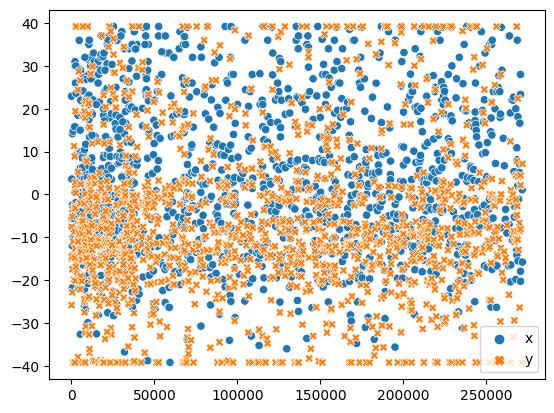

In [100]:
sns.scatterplot(anomalies)

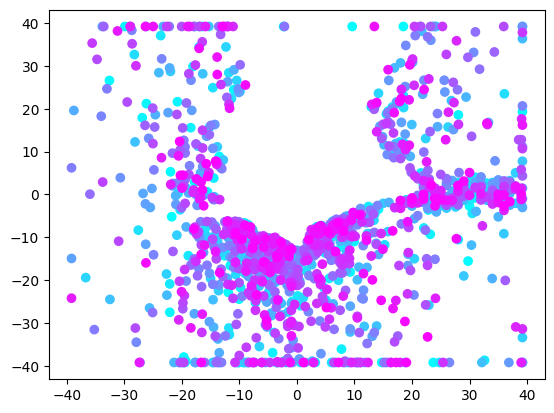

In [107]:



plt.scatter(anomalies.x,anomalies.y,cmap='cool',c=range(len(anomalies)))

In [108]:
anomalies.to_csv('anomalies.csv',index=False)